In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [163]:
import random

In [3]:
# Читаем данные из файла и копим их в списках Python
X = []
Y = []
with open('../../../train_simple_reg.csv','r') as f:
    print(f.readline())
    for line in f:
        data = line.split(',')
        
        _id = int(data[0])
        y = float(data[-1])
        x = [float(_x) for _x in data[1:-1]]

        X.append(x)
        Y.append(y)

id,f1,f2,f3,f4,f5,y



In [4]:
X=np.array(X)
Y=np.array(Y)

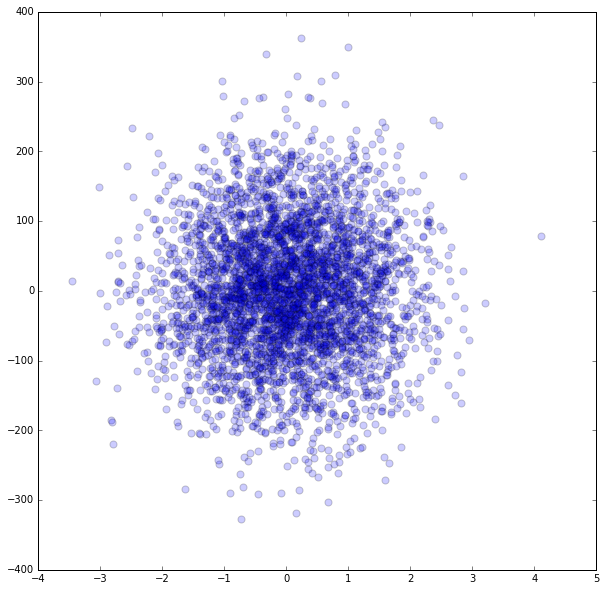

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], Y, alpha=0.2, s=50)
plt.show()

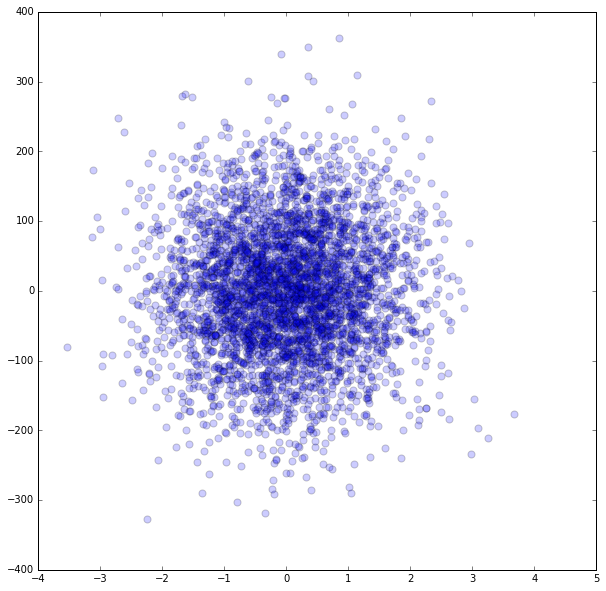

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,1], Y, alpha=0.2, s=50)
plt.show()

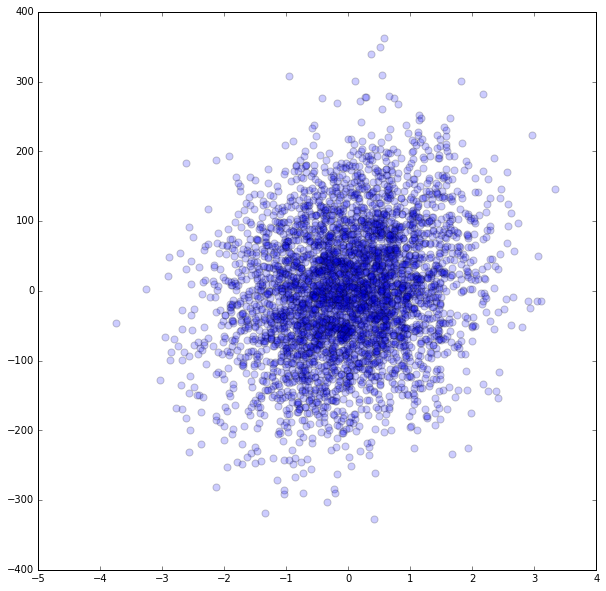

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,2], Y, alpha=0.2, s=50)
plt.show()

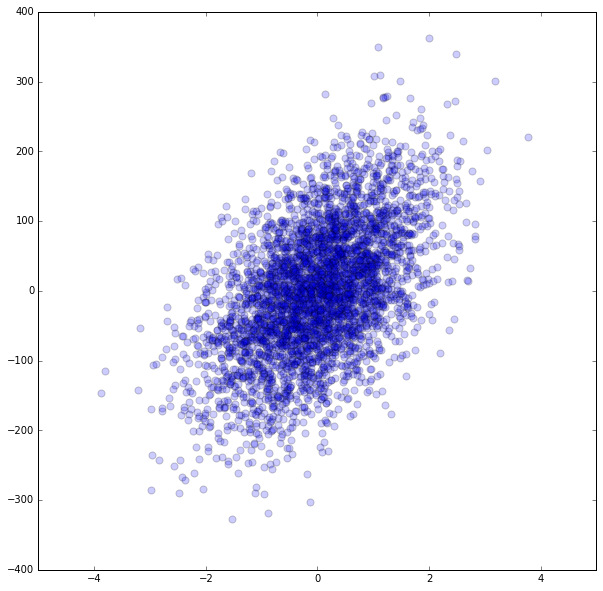

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,3], Y, alpha=0.2, s=50)
plt.show()

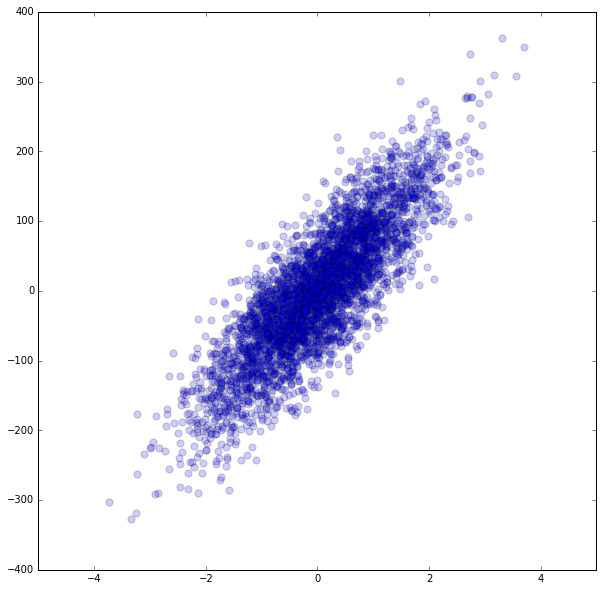

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,4], Y, alpha=0.2, s=50)
plt.show()

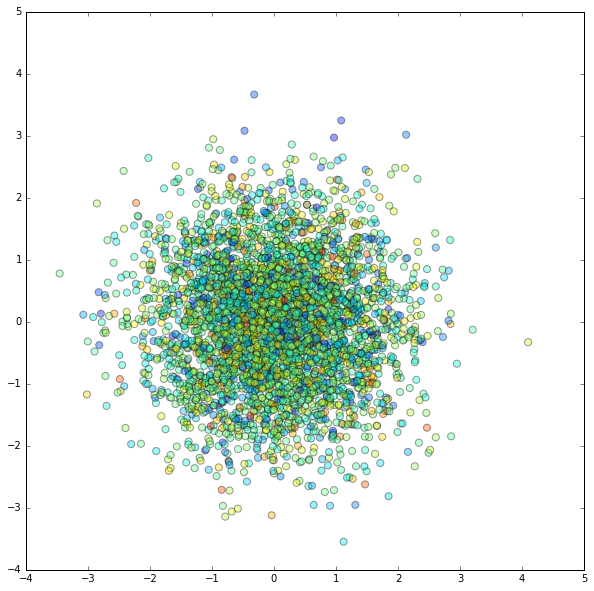

In [434]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1], alpha=0.4, s=50, c=Y)
plt.show()

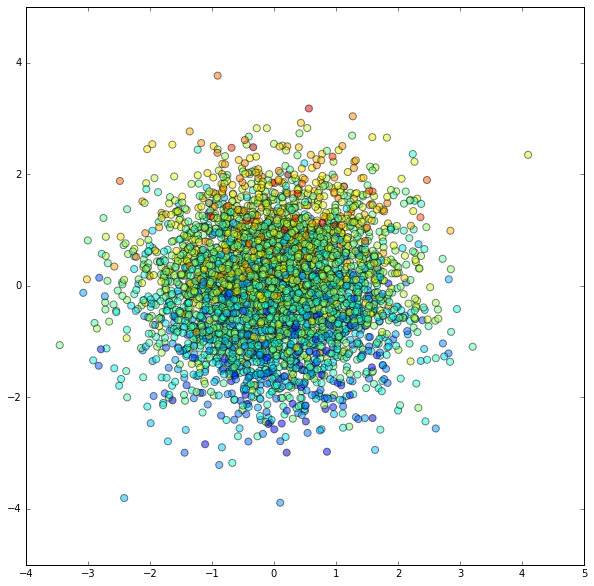

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,3], alpha=0.5, s=50,c=Y)
plt.show()

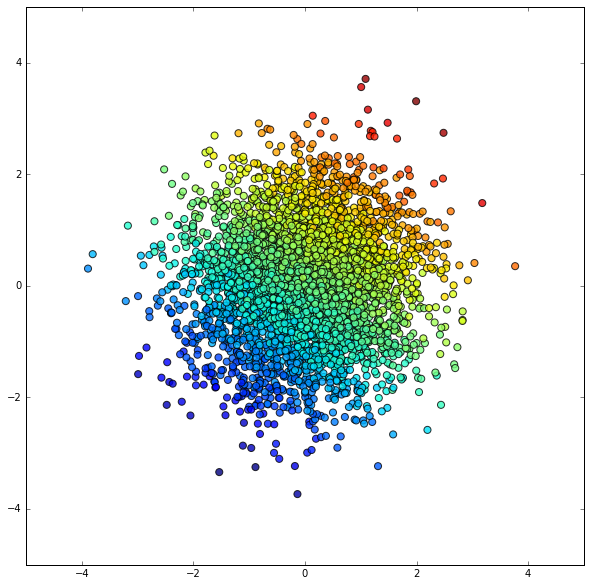

In [435]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,3],X[:,4], alpha=0.8, s=50,c=Y)
plt.show()

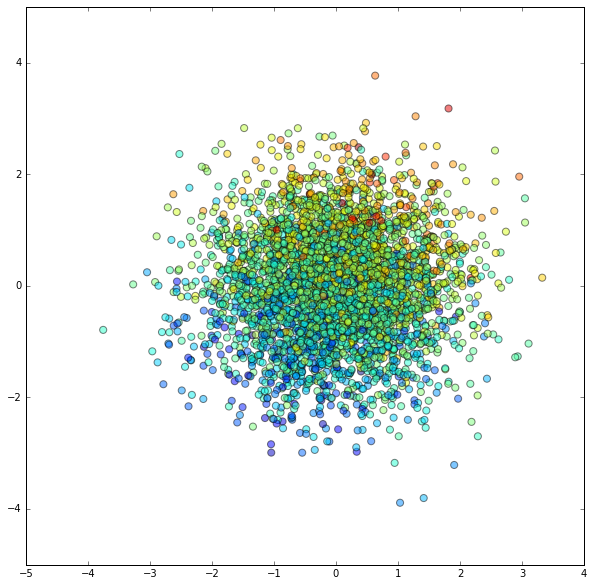

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,2],X[:,3], alpha=0.5, s=50,c=Y)
plt.show()

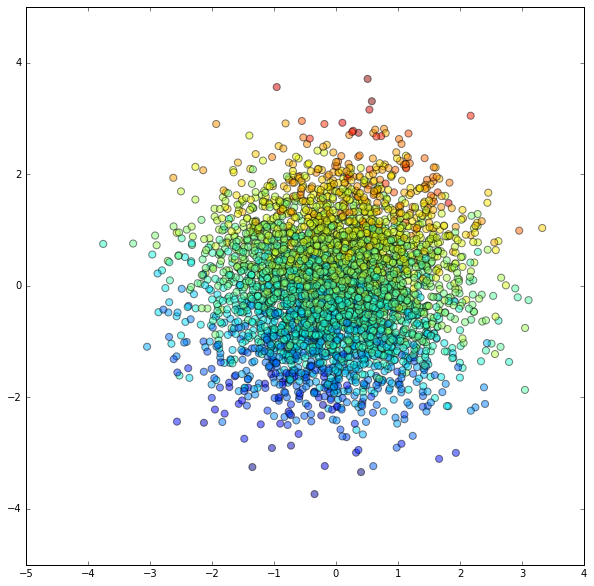

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,2],X[:,4], alpha=0.5, s=50,c=Y)
plt.show()

In [34]:
# Линейная комбинация

In [35]:
W = np.array([10,10,10])

In [37]:
_X = X[:,2:]

In [43]:
((_X.dot(W)-Y)**2).mean()**0.5

79.36063116782069

In [243]:
def mutation_A(W, mitation_probability=0.1):
    new_W = np.copy(W)
    return np.choose(
        np.random.rand(*new_W.shape) > mitation_probability,
        (
            np.random.uniform(low=new_W.min(), high=new_W.max(), size=new_W.shape),
            new_W 
        )
    )

In [244]:
def mutation_B(W, mitation_probability=0.1):
    new_W = np.copy(W)
    learning_rate = 0.2
    return np.choose(
        np.random.rand(*new_W.shape) > mitation_probability,
        (
            ((np.random.randint(0, 2, *new_W.shape)-0.5)*learning_rate)+new_W,
            new_W 
        )
    )

In [436]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [437]:
mutation_A(np.arange(10), 0.5)

array([4.26897396, 1.        , 2.        , 0.77806336, 4.        ,
       5.        , 0.48951145, 7.        , 6.72706315, 6.95309458])

In [438]:
mutation_B(np.arange(10), 0.5)

array([0. , 1. , 2. , 3.1, 3.9, 5.1, 6.1, 7.1, 8.1, 8.9])

In [248]:
def crossover(*W_list):
    W1, W2 = [np.copy(w) for w in W_list]
    p=0.5
    return np.choose(np.random.rand(*W1.shape)>p, (W1, W2))

In [439]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [440]:
np.arange(10,100,10)

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [446]:
crossover(np.arange(1,10), np.arange(10,100,10))

array([10, 20, 30, 40, 50, 60,  7,  8,  9])

In [411]:
POPULATION_SIZE = 100

CROSSOVER_RATE = 0.3

MUTATION_A_RATE = 0.1

MUTATION_B_RATE = 0.1


In [447]:
POPULATION = np.random.randint(low=-40, high=40, size =(3, POPULATION_SIZE))

In [448]:
pop_loss = ((_X.dot(POPULATION).T-Y)**2).mean(axis=1)**0.5
sorted_loss = pop_loss[pop_loss.argsort()]
min_loss = sorted_loss[0]
max_loss = sorted_loss[-1]
print(min_loss, max_loss)

46.776346225370645 146.10404307949977


In [449]:
train_test_split_indices = np.arange(_X.shape[0])

In [450]:
np.random.shuffle(train_test_split_indices)

In [451]:
X_train, Y_train = _X[train_test_split_indices][:2000], Y[train_test_split_indices][:2000]
X_test, Y_test = _X[train_test_split_indices][2000:], Y[train_test_split_indices][2000:]

In [452]:
NEW_POPULATION = []

In [453]:
for i in range(int(POPULATION_SIZE*MUTATION_A_RATE)):
    candidate = random.choice(POPULATION.T)
#     print(candidate)
    new_candidate = mutation_A(candidate)
#     print(new_candidate)
    NEW_POPULATION.append(new_candidate)

In [454]:
for i in range(int(POPULATION_SIZE*MUTATION_B_RATE)):
    candidate = random.choice(POPULATION.T)
#     print(candidate)
    new_candidate = mutation_B(candidate)
#     print(new_candidate)
    NEW_POPULATION.append(new_candidate)

In [455]:
for i in range(int(POPULATION_SIZE*CROSSOVER_RATE)):
    new_obj = crossover(random.choice(POPULATION.T), random.choice(POPULATION.T))
    NEW_POPULATION.append(new_obj)

In [456]:
len(NEW_POPULATION)

50

In [457]:
best_obj_count = len(POPULATION.T) - len(NEW_POPULATION)

In [458]:
BEST_OBJ = POPULATION.T[pop_loss.argsort()][:best_obj_count]

In [459]:
POPULATION = np.vstack(
    [
        np.array(NEW_POPULATION),
        BEST_OBJ
    ]
).T


In [460]:
pop_loss = ((_X.dot(POPULATION).T-Y)**2).mean(axis=1)**0.5
sorted_loss = pop_loss[pop_loss.argsort()]
min_loss = sorted_loss[0]
max_loss = sorted_loss[-1]
print(min_loss, max_loss)

46.776346225370645 138.42971351997653


In [465]:
for epoch in range(1000):
    NEW_POPULATION = []
    
    for i in range(int(POPULATION_SIZE*MUTATION_A_RATE)):
        candidate = random.choice(POPULATION.T)
    #     print(candidate)
        new_candidate = mutation_A(candidate, 0.3)
    #     print(new_candidate)
        NEW_POPULATION.append(new_candidate)
        
    for i in range(int(POPULATION_SIZE*MUTATION_B_RATE)):
        candidate = random.choice(POPULATION.T)
    #     print(candidate)
        new_candidate = mutation_B(candidate, 0.3)
    #     print(new_candidate)
        NEW_POPULATION.append(new_candidate)
        
    for i in range(int(POPULATION_SIZE*CROSSOVER_RATE)):
        new_obj = crossover(random.choice(POPULATION.T), random.choice(POPULATION.T))
        NEW_POPULATION.append(new_obj)
        
    best_obj_count = len(POPULATION.T) - len(NEW_POPULATION)
    
    BEST_OBJ = POPULATION.T[pop_loss.argsort()][:best_obj_count]
    
    POPULATION = np.vstack(
        [
            np.array(NEW_POPULATION),
            BEST_OBJ
        ]
    ).T
    
    pop_loss = ((X_train.dot(POPULATION).T-Y_train)**2).mean(axis=1)**0.5
    
    sorted_idx = pop_loss.argsort()
    sorted_loss = pop_loss[sorted_idx]
    most_best_obj = POPULATION.T[sorted_idx[0]]
    
    print('epoch', epoch, 'Test loss:', ((X_test.dot(most_best_obj)-Y_test)**2).mean()**0.5)
    min_loss = sorted_loss[0]
    max_loss = sorted_loss[-1]
